# Deep Convolutional Variational Autoencoder Test

### Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from dcvae import DCVAE
from tensorflow.keras.datasets import mnist

### Loading DCVAE

In [4]:
dcvae=DCVAE.load(save_folder="model")

Instructions for updating:
Colocations handled automatically by placer.


### Loading MNIST

In [2]:
# loading mnist with reshaping and normalization
def load_mnist():
    
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype("float32")/255
    X_train = X_train.reshape(X_train.shape + (1,))

    X_test = X_test.astype("float32")/255
    X_test = X_test.reshape(X_test.shape + (1,))

    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = load_mnist()

### Sampling images and comparing them with their reconstruction

In [7]:
def sample_images(images, labels, num_images=10):
    idx=np.random.choice(range(len(images)), num_images)
    sampled_images=images[idx]
    sampled_labels=labels[idx]

    return sampled_images, sampled_labels

In [13]:
def compare_images(images, reconstructed_images):
    num_images=len(images)

    fig = plt.figure(figsize=(15,5))

    for idx, (image, reconstructed_image) in enumerate(zip(images, reconstructed_images)):
        image=image.squeeze()

        ax = fig.add_subplot(2, num_images, idx+1)
        ax.imshow(image, cmap="gray_r")

        reconstructed_image=reconstructed_image.squeeze()

        ax = fig.add_subplot(2, num_images, idx+num_images+1)
        ax.imshow(reconstructed_image, cmap="gray_r")

#### Sample images

In [8]:
sampled_images, _ = sample_images(X_train, y_train, num_images=10)

#### Reconstruct images

In [9]:
reconstructed_images, _ = dcvae.reconstruct(sampled_images)

C:\Users\6trze\anaconda3\envs\data-science-env\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


#### Compare sampled images with their reconstructions

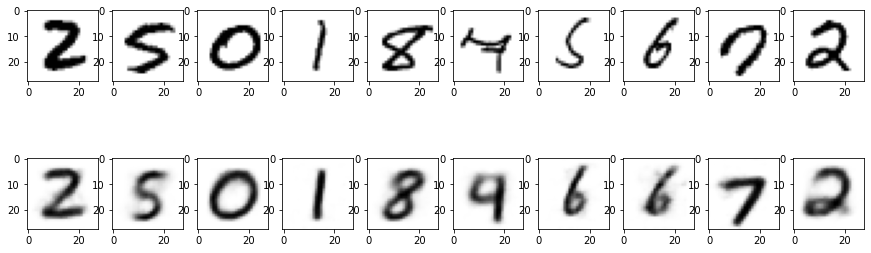

In [14]:
compare_images(sampled_images, reconstructed_images)

### Latent space representations

In [17]:
def plot_latent_space(latent_space_representations, labels):
    plt.figure(figsize=(10, 10))

    plt.scatter(latent_space_representations[:,0], latent_space_representations[:, 1], cmap="rainbow", c=labels, alpha=0.5)
    plt.colorbar()

#### Sample images

In [15]:
sampled_images, sampled_labels = sample_images(X_train, y_train, num_images=10000)

#### Get latent space representations

In [16]:
_, latent_space_representations = dcvae.reconstruct(sampled_images)

#### Plot latent space

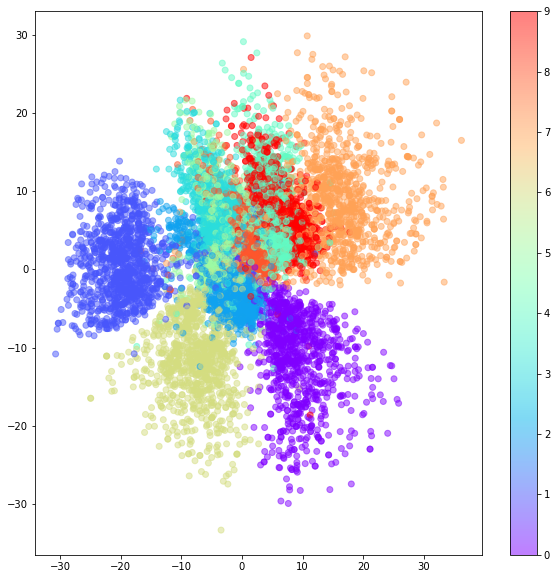

In [18]:
plot_latent_space(latent_space_representations, sampled_labels)